In [182]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./DATA/government-finance-statistics-central-government-year-ended-june-2018.csv')

In [9]:
df['Series_title_1'].unique()

array(['Net operating balance', 'Net lending/borrowing',
       'Social security contributions', 'Other income',
       'Sales of goods and services', 'Dividend income',
       'Interest income', 'Current grants', 'Other current transfers',
       'Capital grants', 'Other capital transfers', 'Taxation revenue',
       'Total', 'Employee expenses', 'Purchases of goods and services',
       'Interest expense', 'Social benefits', 'Other expenses',
       'Subsidies', 'Depreciation', 'Fixed assets', 'Valuables', 'Land',
       'Other non-produced non-financial assets', 'Change in inventories',
       'Non-financial assets', 'Assets', 'Net worth',
       'Net financial worth', 'Gross debt', 'Net debt',
       'ACC outstanding claims liability', 'Financial assets', 'Cash',
       'Debt securities', 'Loans', 'Retirement plan liabilities',
       'Insurance liabilities', 'Financial derivatives',
       'Other accounts payable', 'Special drawing rights (SDRs)',
       'General public services',

In [142]:
df_overseas = pd.read_csv('./DATA/overseas-trade-index-march-2019-quarter-provisional-csv.csv')
df_overseas.drop(['MAGNTUDE', 'Series_title_3', 'Series_title_4', 'Series_title_5'], inplace=True, axis=1)

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df_overseas.Period.min()

1925.06

In [32]:
df_overseas.describe()

,Period,Data_value,MAGNTUDE
count,90722.000000,9.005300e+04,90722.000000
mean,1999.719343,6.302243e+05,0.687749
std,13.569145,7.208336e+06,1.261058
min,1925.060000,-3.830000e+01,0.000000
25%,1992.090000,7.413136e+02,0.000000
50%,2002.030000,1.007681e+03,0.000000
75%,2010.090000,2.194238e+03,0.000000
max,2019.030000,1.123282e+09,3.000000


In [144]:
df_overseas['date_col'] = df_overseas['Period'].astype(str).str.split('.')

In [159]:
df_overseas['year'] = [x[0] for x in df_overseas['date_col']]
df_overseas['year'] = pd.to_numeric(df_overseas['year'])

In [158]:
df_overseas['month'] = [x[1] for x in df_overseas['date_col']]
df_overseas['month'] = pd.to_numeric(df_overseas['month'])

In [161]:
df_overseas.drop(columns=['Period', 'date_col'], inplace=True, axis=1)

In [163]:
df_overseas.head()

,Series_reference,Data_value,STATUS,UNITS,Subject,Group,Series_title_1,Series_title_2,year,month
0,OTVA.SEA2AA1,369.135776,FINAL,Index,Overseas Trade Indexes - Volumes and Values - OTV,Export volume indexes and values - analytical,Volume,BEEF AND VEAL,1971,6
1,OTVA.SEA2AA1,376.398285,FINAL,Index,Overseas Trade Indexes - Volumes and Values - OTV,Export volume indexes and values - analytical,Volume,BEEF AND VEAL,1972,6
2,OTVA.SEA2AA1,415.590787,FINAL,Index,Overseas Trade Indexes - Volumes and Values - OTV,Export volume indexes and values - analytical,Volume,BEEF AND VEAL,1973,6
3,OTVA.SEA2AA1,375.020912,FINAL,Index,Overseas Trade Indexes - Volumes and Values - OTV,Export volume indexes and values - analytical,Volume,BEEF AND VEAL,1974,6
4,OTVA.SEA2AA1,400.815339,FINAL,Index,Overseas Trade Indexes - Volumes and Values - OTV,Export volume indexes and values - analytical,Volume,BEEF AND VEAL,1975,6


In [165]:
df_overseas.UNITS.unique()

array(['Index', 'Dollars', 'Percent', 'index'], dtype=object)

In [166]:
df_dollars = df_overseas[df_overseas['UNITS'] == "Dollars"]

In [174]:
df_dollars.Series_title_2.unique()

array(['BEEF AND VEAL', 'LAMB', 'LAMB, HOGGET AND MUTTON', 'OTHER MEAT',
       'TOTAL MEAT', 'CRUSTACEANS AND MOLLUSCS',
       'FISH (LIVE, FRESH, CHILLED OR FROZEN)',
       'FISH AND FISH PREPARATIONS', 'SKIMMED AND BUTTERMILK POWDER',
       'WHOLE MILK POWDER', 'MILK POWDER',
       'MILK AND CREAM (LIQUID OR POWDER)', 'BUTTER', 'CHEESE',
       'DAIRY PRODUCTS', 'CASEIN', 'DAIRY AND CASEIN PRODUCTS',
       'VEGETABLES (FRESH OR PREPARED)', 'APPLES (FRESH)',
       'FRUIT (FRESH OR PREPARED)',
       'FRUIT AND VEGETABLES (FRESH OR PREPARED)', 'ALCOHOLIC BEVERAGES',
       'CRUDE ANIMAL AND VEGETABLE MATERIALS', 'ANIMAL OILS AND FATS',
       'PETROLEUM AND PETROLEUM PRODUCTS',
       'MINERAL FUELS, OILS AND RELATED MATERIALS',
       'CHEMICALS AND RELATED PRODUCTS',
       'HIDES, SKINS AND FURSKINS - RAW',
       'LEATHER AND TANNED OR DRESSED FURSKINS', 'WOOD', 'WOOD PULP',
       'WOOD MANUFACTURE', 'NEWSPRINT', 'PAPER AND PAPER PRODUCTS',
       'FORESTRY PRODUCTS', 'WOOL

In [169]:
df_percent = df_overseas[df_overseas['UNITS'] == "Percent"]

In [173]:
df_percent.Series_title_2.unique()

array(['TOTAL EXPORTS', 'TOTAL IMPORTS', 'All merchandise',
       'Total Imports',
       'Percentage change from same period previous year',
       'Percentage change from previous period'], dtype=object)

In [218]:
df_total_imports_dollars = df_dollars[(df_dollars['Series_title_2'] == 'Total Imports') | 
                                     (df_dollars['Series_title_2'] == 'TOTAL IMPORTS')]

In [190]:
df_total_imp_exp_percent = df_percent[(df_percent['Series_title_2'] == 'TOTAL IMPORTS') | (df_percent['Series_title_2'] == 'TOTAL EXPORTS')]

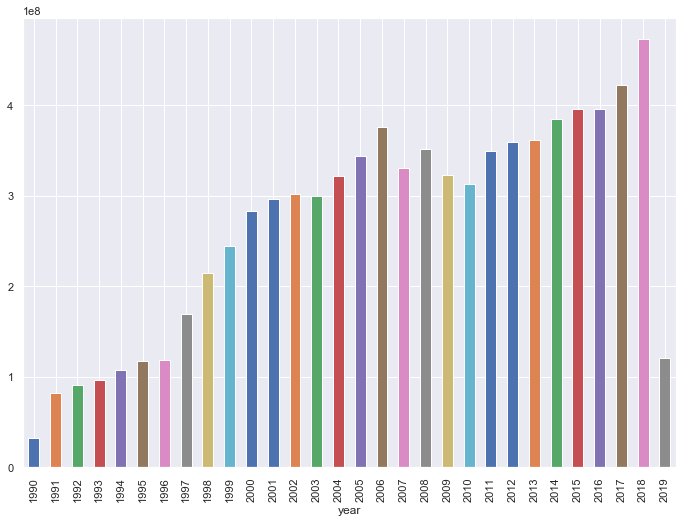

In [221]:
df_total_imports_dollars.groupby('year')['Data_value'].sum().plot.bar()

In [222]:
df_total_exports_dollars = df_dollars[(df_dollars['Series_title_2'] == 'Total Exports') | 
                                     (df_dollars['Series_title_2'] == 'TOTAL EXPORTS')]

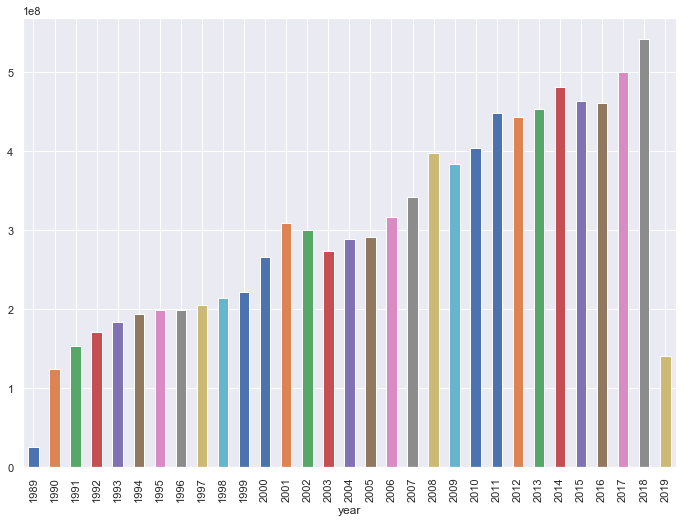

In [223]:
df_total_exports_dollars.groupby('year')['Data_value'].sum().plot.bar()

In [224]:
df_totals_dollars = df_dollars[(df_dollars['Series_title_2'] == 'Total Imports') | 
                                     (df_dollars['Series_title_2'] == 'TOTAL IMPORTS') |
                              (df_dollars['Series_title_2'] == 'Total Exports') | 
                                     (df_dollars['Series_title_2'] == 'TOTAL EXPORTS')]

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


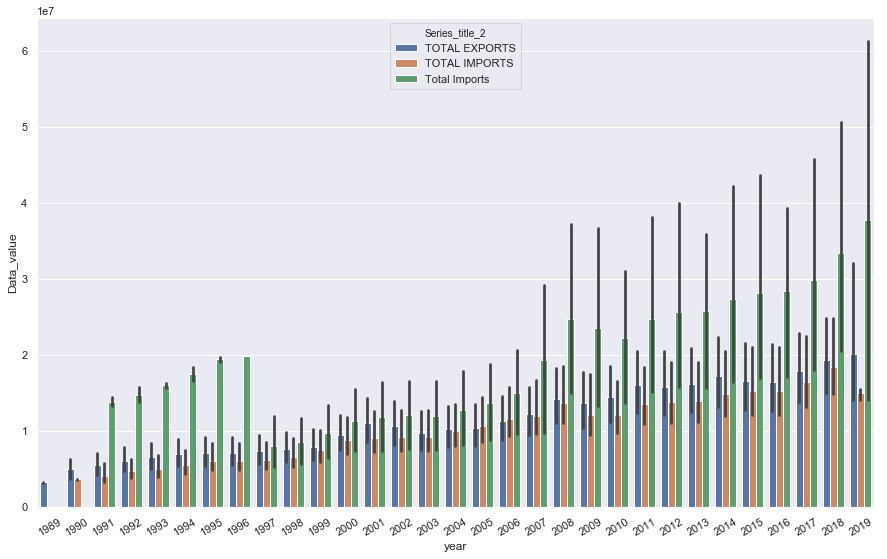

In [227]:
f, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x='year', y='Data_value', hue="Series_title_2", data=df_totals_dollars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


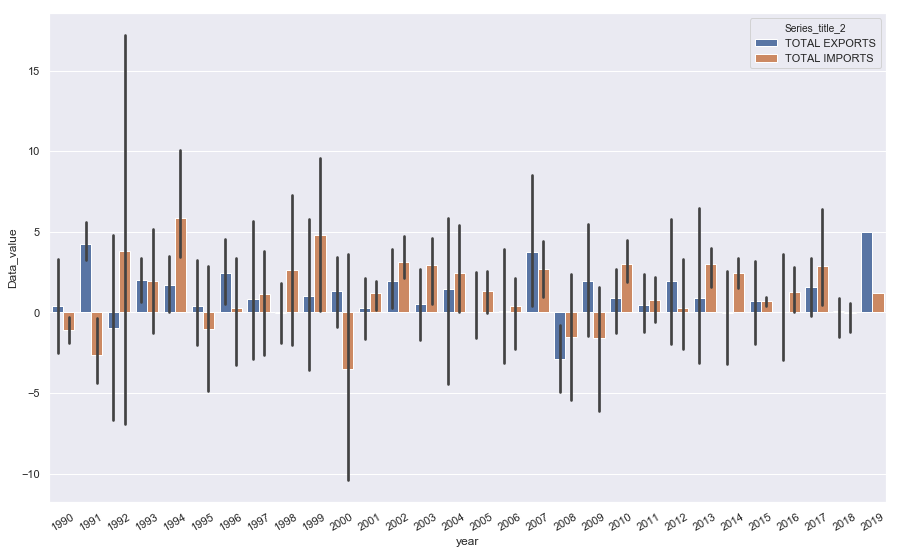

In [192]:
f, ax = plt.subplots(figsize=(15, 9))
g = sns.barplot(x='year', y='Data_value', data=df_total_imp_exp_percent, hue='Series_title_2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [200]:
df_max_type_sold = df_dollars.copy()

In [214]:
df_max_type_sold = df_max_type_sold[~(df_max_type_sold["Series_title_2"].str.contains("TOTAL")) & 
                                   ~(df_max_type_sold["Series_title_2"].str.contains("total"))]

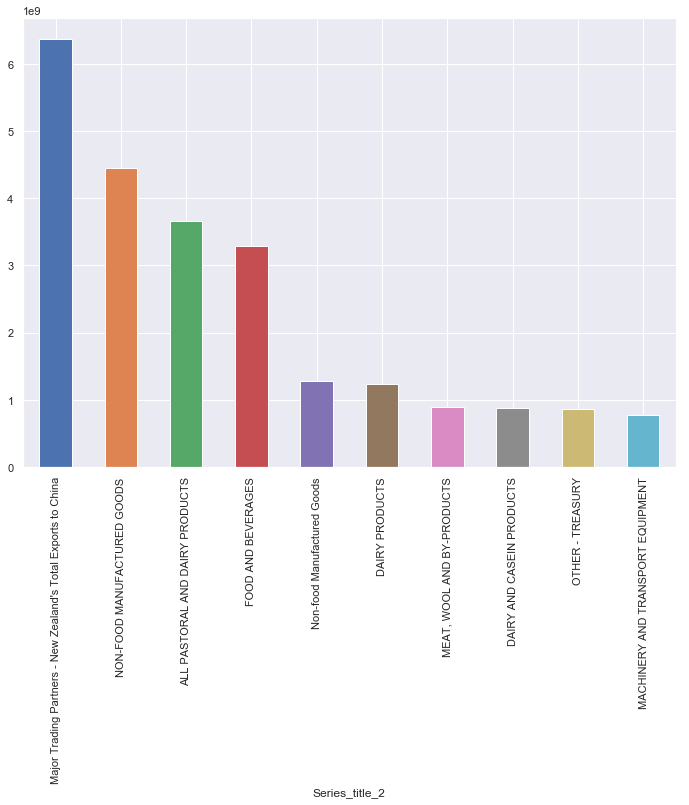

In [216]:
df_max_type_sold.groupby("Series_title_2")["Data_value"].sum().sort_values(ascending=False)[:10].plot.bar()

In [235]:
df_countries_exports = df_dollars[(df_dollars["Series_title_2"].str.contains("Exports to"))]

In [243]:
df_countries_exports.describe()

,Data_value,year,month
count,7.360000e+02,736.000000,736.000000
mean,9.795523e+06,2003.976902,7.214674
std,7.361885e+07,8.514302,3.077255
min,3.627467e+04,1989.000000,3.000000
25%,4.530894e+05,1997.000000,6.000000
50%,9.251520e+05,2004.000000,6.000000
75%,1.723890e+06,2011.000000,9.000000
max,1.123282e+09,2019.000000,12.000000


In [247]:
# Remove outliers, get the last 95th Percentile
q = df_countries_exports["Data_value"].quantile(0.95)
df_countries_exports = df_countries_exports[df_countries_exports["Data_value"] < q]

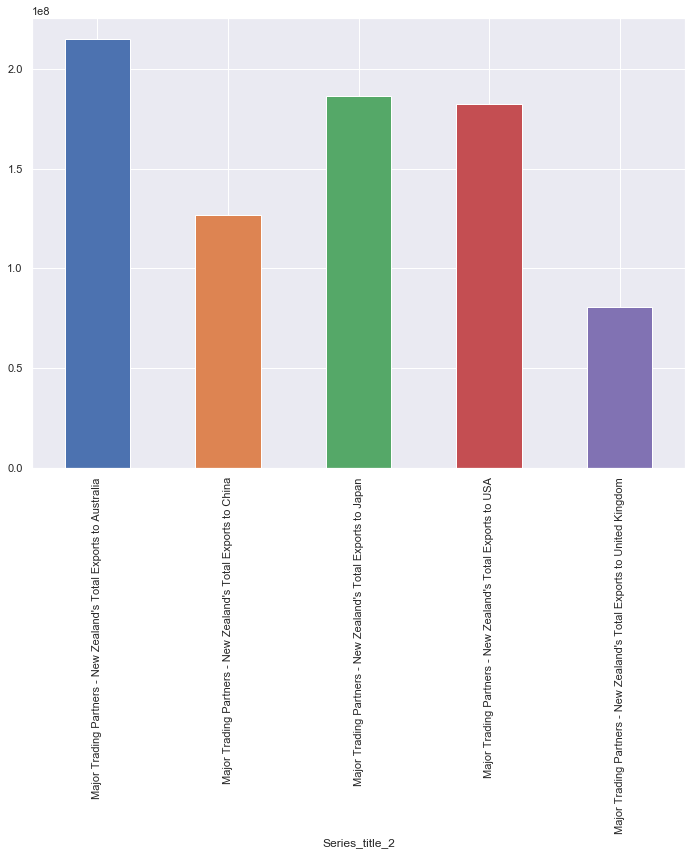

In [249]:
df_countries_exports.groupby("Series_title_2")["Data_value"].sum().plot.bar()

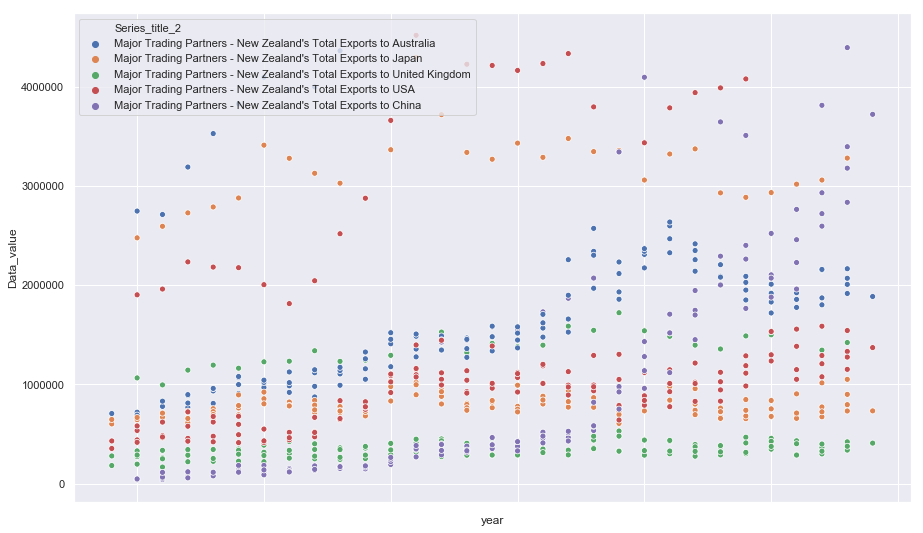

In [248]:
f, ax = plt.subplots(figsize=(15, 9))
g = sns.scatterplot(x='year', y='Data_value', data=df_countries_exports, hue='Series_title_2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [250]:
df_countries_imports = df_dollars[(df_dollars["Series_title_2"].str.contains("Imports from"))]

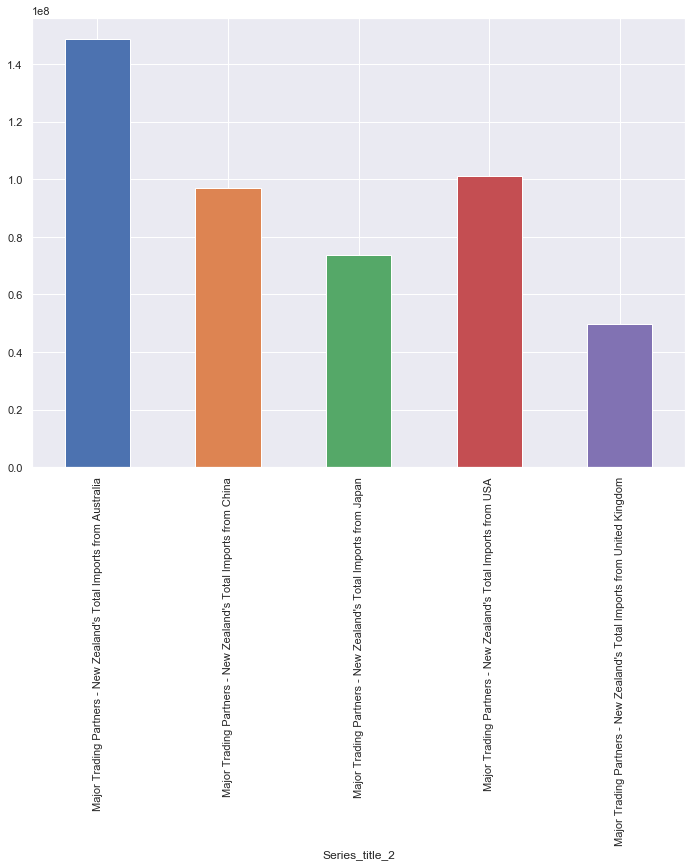

In [253]:
q = df_countries_imports["Data_value"].quantile(0.95)
df_countries_imports = df_countries_imports[df_countries_imports["Data_value"] < q]
df_countries_imports.groupby("Series_title_2")["Data_value"].sum().plot.bar()

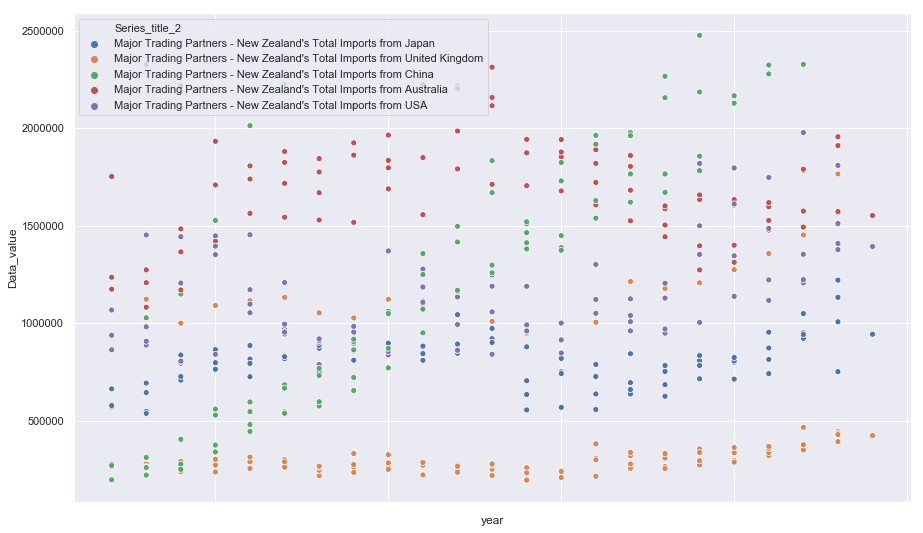

In [254]:
f, ax = plt.subplots(figsize=(15, 9))
g = sns.scatterplot(x='year', y='Data_value', data=df_countries_imports, hue='Series_title_2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()